<h1><b>Regression for Predicting Hospitalisation Cost($)</b></h1>
<h5>Name : Shaun Kwo Rui Yu
</br>Class : DAAA/FT/1B/06
</br>Admin No.:2317933 </h5>

<hr></hr>
<h1>Regression Dataset for </h1>
<hr></hr>

<h5><b>The objectives of this assignment are to:</b></h5>
This dataset comprises information related to hospital patients and includes 1338 data points with 7 columns.

<ul>
  <li><b>ID:</b> Unique identifier for each patient</li>
  <li><b>Age:</b> Age of the patient</li>
  <li><b>Gender:</b> Gender of the patient</li>
  <li><b>BMI:</b> Body Mass Index of the patient</li>
  <li><b>Smoker:</b> Smoking status of the patient (yes/no)</li>
  <li><b>Region:</b> Region of residence of the patient</li>
  <li><b>Cost ($):</b> Hospital cost incurred by the patient</li>
</ul>

<h5><b>Steps in the Project:</b></h5>
<ol>
  <li><b>Step 1: Exploratory Data Analysis (EDA)</b>
    <ol>
      <li>1.1 Data Overview: Load the dataset, check for missing values, duplicated entries, and basic statistics.</li>
      <li>1.2 Feature Analysis: Visualize feature distributions, explore correlations, and consider feature engineering.</li>
      <li>1.3 Target Variable Distribution: Understand the distribution of the target variable (Cost).</li>
    </ol>
  </li>
  <li><b>Step 2: Data Preprocessing</b>
    <ol>
      <li>2.1 Handling Missing Values: Identify and handle missing values.</li>
      <li>2.2 Feature Scaling and Normalization: Standardize numerical features and apply normalization if necessary.</li>
      <li>2.3 Encoding Categorical Variables: Encode categorical variables into numerical representations.</li>
    </ol>
  </li>
  <li><b>Step 3: Model Selection</b>
    <ol>
      <li>3.1 Define the Problem: Clearly define the problem as a regression task.</li>
      <li>3.2 Model Choices: Select candidate regression algorithms (Linear Regression, Decision Trees, Random Forest, Gradient Boosting).</li>
      <li>3.3 Train-Test Split: Split the dataset into training and testing sets.</li>
    </ol>
  </li>
  <li><b>Step 4: Model Training and Evaluation</b>
    <ol>
      <li>4.1 Train the Models: Train each selected model on the training set.</li>
      <li>4.2 Evaluate Model Performance: Assess metrics such as Mean Absolute Error, Mean Squared Error, and R-squared.</li>
      <li>4.3 Hyperparameter Tuning: Fine-tune hyperparameters for selected models.</li>
    </ol>
  </li>
  <li><b>Step 5: Dummy Baseline and Model Interpretability</b>
    <ol>
      <li>5.1 Dummy Baseline: Establish a dummy regressor for baseline comparison.</li>
      <li>5.2 Model Interpretability: Analyze feature importance for interpretability.</li>
    </ol>
  </li>
  <li><b>Conclusion</b>
    <ol>
      <li>Summarize key findings, insights, and challenges.</li>
      <li>Provide recommendations for further improvement or exploration.</li>
    </ol>
  </li>
</ol>


<hr></hr>
<h3>1. Exploratory Data Analysis(EDA)</h3>
<hr></hr>

1.1 Data Overview

In [1]:
import pandas as pd

# Loading dataset
regression_data=pd.read_csv('CA1-Dataset\CA1-Regression-Dataset.csv')
print(regression_data)

# Checking structure
print(regression_data.info())


        ID  Age  Gender     BMI Smoker     Region     Cost ($)
0        1   19  female  27.900    yes  southwest  16884.92400
1        2   18    male  33.770     no  southeast   1725.55230
2        3   28    male  33.000     no  southeast   4449.46200
3        4   33    male  22.705     no  northwest  21984.47061
4        5   32    male  28.880     no  northwest   3866.85520
...    ...  ...     ...     ...    ...        ...          ...
1333  1334   50    male  30.970     no  northwest  10600.54830
1334  1335   18  female  31.920     no  northeast   2205.98080
1335  1336   18  female  36.850     no  southeast   1629.83350
1336  1337   21  female  25.800     no  southwest   2007.94500
1337  1338   61  female  29.070    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int6

In [2]:
# Checking basic statistics
stats=regression_data.describe()
print(stats)

                ID          Age          BMI      Cost ($)
count  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397  13270.422265
std     386.391641    14.049960     6.098187  12110.011237
min       1.000000    18.000000    15.960000   1121.873900
25%     335.250000    27.000000    26.296250   4740.287150
50%     669.500000    39.000000    30.400000   9382.033000
75%    1003.750000    51.000000    34.693750  16639.912515
max    1338.000000    64.000000    53.130000  63770.428010


1.2 Feature Analysis and Data Visualisation

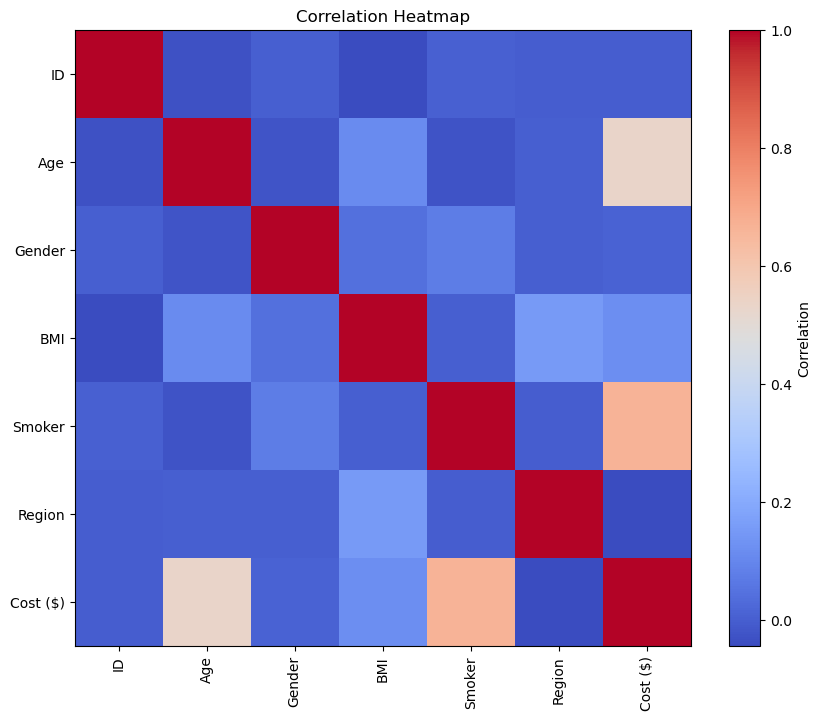

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Creating a HEATMAP to check for the presence of correlation between variables in the dataset

# Drop the 'row_number' column
regression_data1 = regression_data.drop('row_number', axis=1, errors='ignore')

# Encode categorical variables
le = LabelEncoder()
regression_data1 = regression_data1.apply(le.fit_transform)

# Calculate the correlation matrix
correlation_matrix = regression_data1.corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

# Add colorbar
cbar = plt.colorbar(heatmap, label='Correlation')

# Set ticks and labels
ax.set_xticks(range(len(correlation_matrix)))
ax.set_yticks(range(len(correlation_matrix)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()



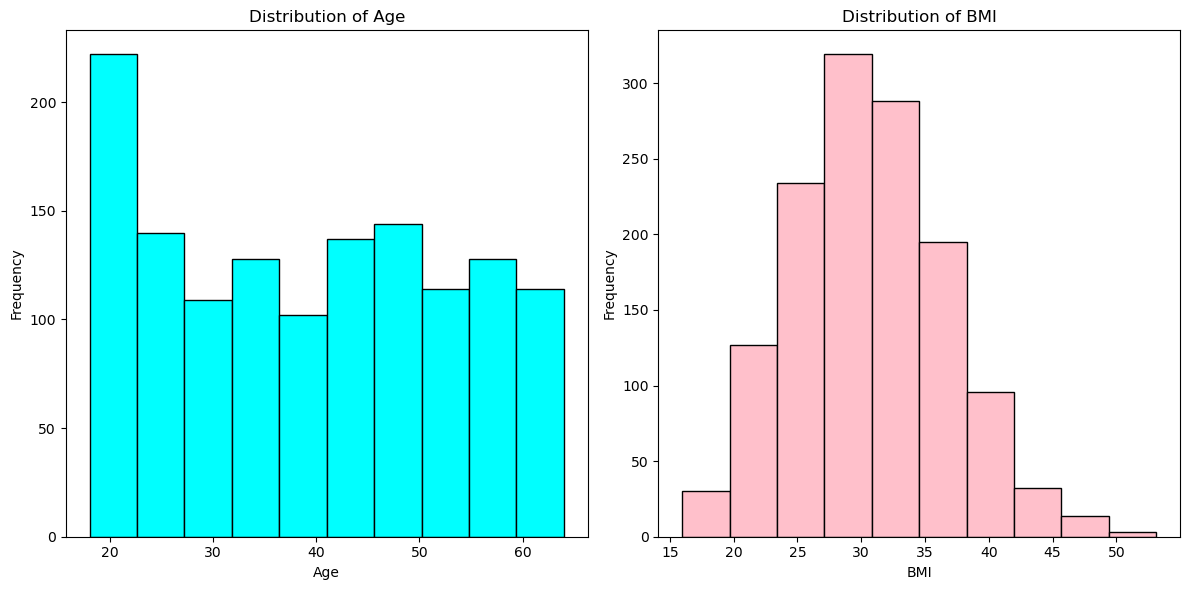

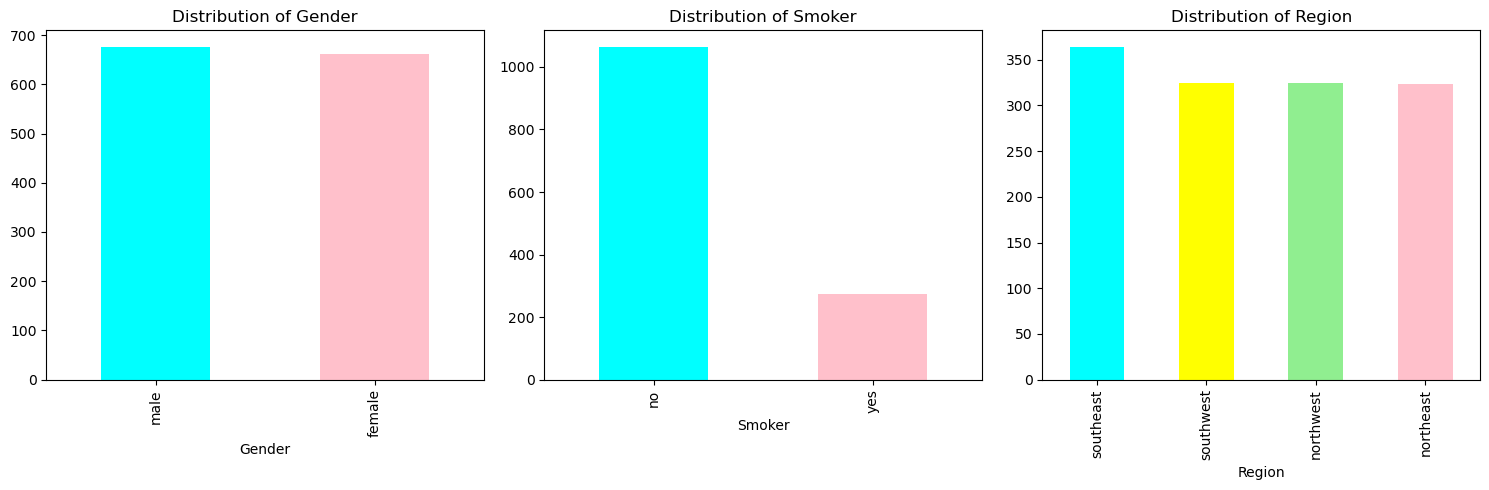

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(regression_data['Age'], color='cyan', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(regression_data['BMI'],color='pink', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
regression_data['Gender'].value_counts().plot(kind='bar', color=['cyan', 'pink'])
plt.title('Distribution of Gender')

plt.subplot(1, 3, 2)
regression_data['Smoker'].value_counts().plot(kind='bar', color=['cyan', 'pink'])
plt.title('Distribution of Smoker')

plt.subplot(1, 3, 3)
regression_data['Region'].value_counts().plot(kind='bar', color=['cyan', 'yellow', 'lightgreen', 'pink'])
plt.title('Distribution of Region')

plt.tight_layout()
plt.show()


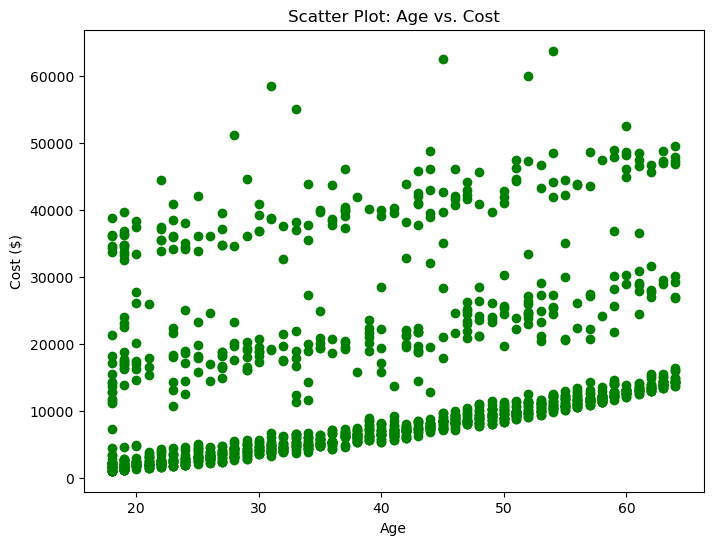

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(regression_data['Age'], regression_data['Cost ($)'], color='green')
plt.title('Scatter Plot: Age vs. Cost')
plt.xlabel('Age')
plt.ylabel('Cost ($)')
plt.show()

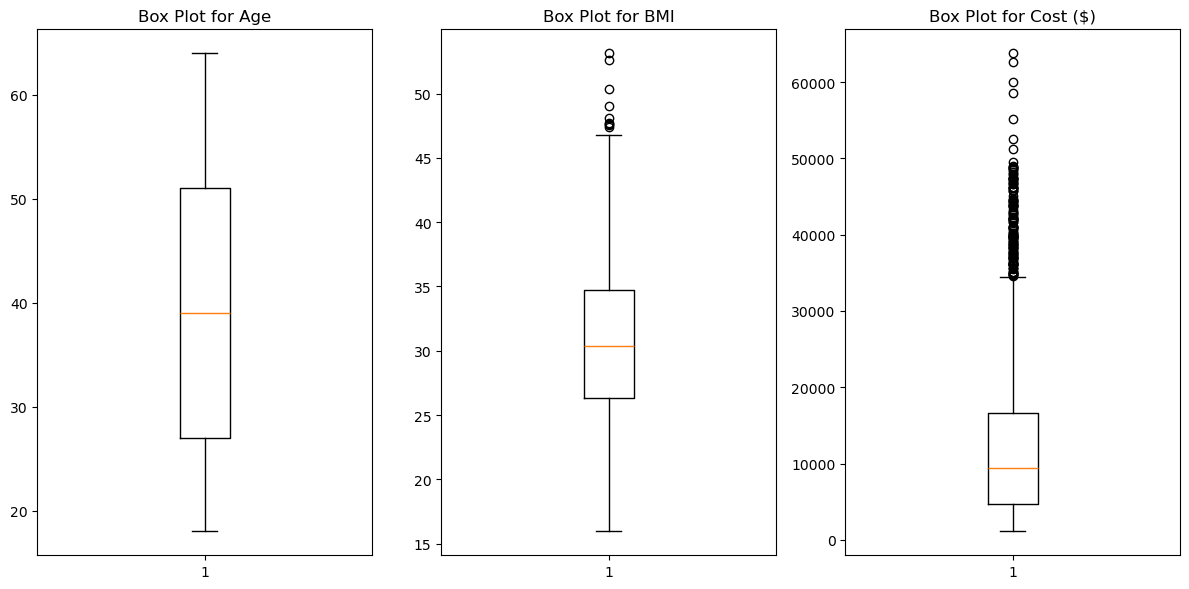

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Box plot for Age
plt.subplot(1, 3, 1)
plt.boxplot(regression_data['Age'])
plt.title('Box Plot for Age')

# Box plot for BMI
plt.subplot(1, 3, 2)
plt.boxplot(regression_data['BMI'])
plt.title('Box Plot for BMI')

# Box plot for Cost ($)
plt.subplot(1, 3, 3)
plt.boxplot(regression_data['Cost ($)'])
plt.title('Box Plot for Cost ($)')

plt.tight_layout()
plt.show()


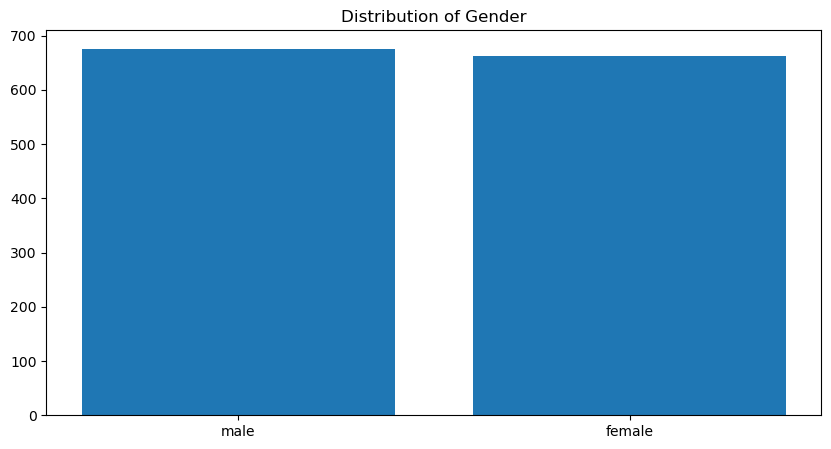

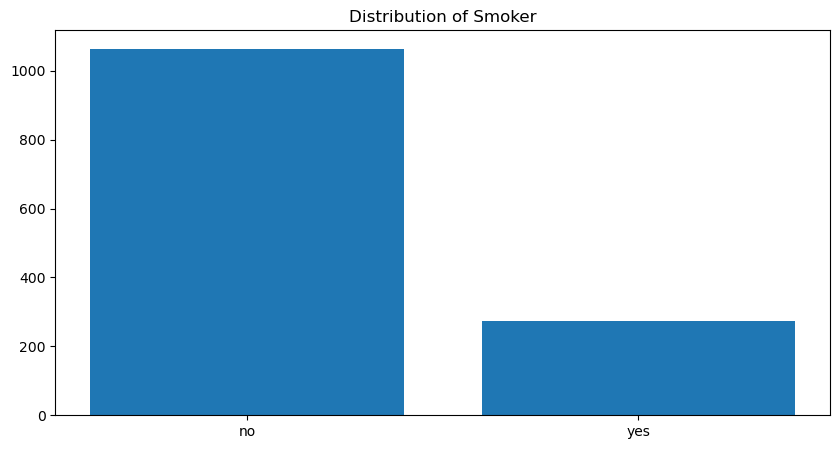

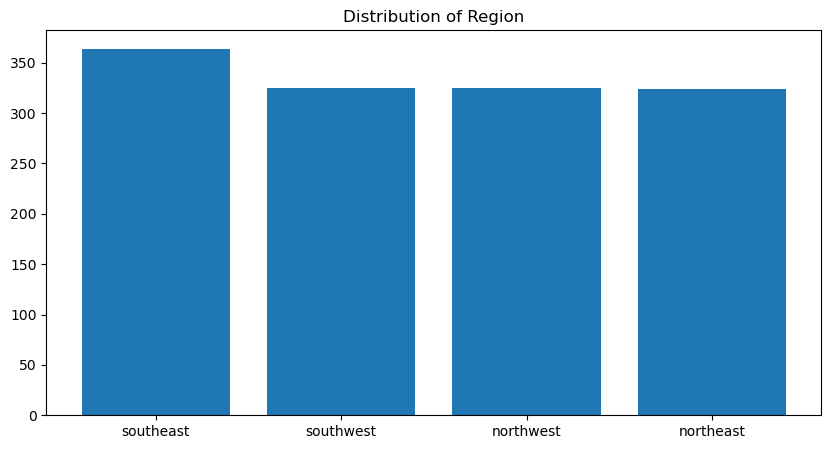

In [7]:
import matplotlib.pyplot as plt

# Bar plot for Gender
plt.figure(figsize=(10, 5))
plt.bar(regression_data['Gender'].value_counts().index, regression_data['Gender'].value_counts())
plt.title('Distribution of Gender')
plt.show()

# Bar plot for Smoker
plt.figure(figsize=(10, 5))
plt.bar(regression_data['Smoker'].value_counts().index, regression_data['Smoker'].value_counts())
plt.title('Distribution of Smoker')
plt.show()

# Bar plot for Region
plt.figure(figsize=(10, 5))
plt.bar(regression_data['Region'].value_counts().index, regression_data['Region'].value_counts())
plt.title('Distribution of Region')
plt.show()


<hr></hr>
<h3>2 Data Cleaning</h3>
<hr></hr>

2.1 Checking missing data, duplicated data and anomalies

In [8]:
import pandas as pd
import numpy as np

# Checking row for missing values if the number of values missing is >3
print(f"The number of missing values for each column is \n{regression_data.isnull().sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {regression_data.duplicated().sum()}")

# Checking for rows with more than one missing value
indices_more_than_one_null = regression_data[regression_data.isnull().sum(axis=1) > 1].index
print(f"\nThe rows with 2 or more data missing are {indices_more_than_one_null.tolist()}")

# Selecting numerical columns for z-score calculation
regression_data_number = regression_data[['Age', 'BMI', 'Cost ($)']]

# Calculate z-scores for numerical features
z_scores = (regression_data_number - regression_data_number.mean()) / regression_data_number.std()

# Set the z-score threshold
z_score_limit = 2.5

# Identify rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = regression_data.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")


The number of missing values for each column is 
ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

The number of rows with duplicated data is 0

The rows with 2 or more data missing are []

The rows with numerical anomalies are:
[34, 39, 55, 86, 94, 109, 116, 175, 185, 251, 252, 256, 265, 281, 286, 288, 328, 330, 401, 420, 421, 438, 454, 488, 530, 543, 547, 549, 569, 577, 587, 660, 668, 674, 677, 706, 739, 819, 826, 845, 847, 860, 883, 893, 901, 930, 941, 951, 1031, 1047, 1062, 1088, 1096, 1122, 1146, 1230, 1240, 1241, 1284, 1300, 1301, 1317, 1323]


2.2 Dropping the rows with anomalies and creating a new file that has clean data

In [9]:
# Drop rows with numerical anomalies from regression_data
rd_dropped = regression_data.drop(rows_numerical_anomalies, axis=0)
rd_dropped= pd.DataFrame(rd_dropped)
# Print the modified DataFrame
print(rd_dropped)

# Save the modified DataFrame to an Excel file
rd_dropped.to_excel('CA1-Dataset/CA1-clean_Regression-Dataset.xlsx', engine='openpyxl')


        ID  Age  Gender     BMI Smoker     Region     Cost ($)
0        1   19  female  27.900    yes  southwest  16884.92400
1        2   18    male  33.770     no  southeast   1725.55230
2        3   28    male  33.000     no  southeast   4449.46200
3        4   33    male  22.705     no  northwest  21984.47061
4        5   32    male  28.880     no  northwest   3866.85520
...    ...  ...     ...     ...    ...        ...          ...
1333  1334   50    male  30.970     no  northwest  10600.54830
1334  1335   18  female  31.920     no  northeast   2205.98080
1335  1336   18  female  36.850     no  southeast   1629.83350
1336  1337   21  female  25.800     no  southwest   2007.94500
1337  1338   61  female  29.070    yes  northwest  29141.36030

[1275 rows x 7 columns]


2.3 One-hot encoding

In [10]:
# dropping the ID as it is not a useful data
rd_dropped=rd_dropped[[ 'Age', 'Gender',   'BMI', 'Smoker', 'Region','Cost ($)']]
print(rd_dropped)
# One-Hot Encoding
rd_dropped['Gender'] = rd_dropped['Gender'].map({'male': 0, 'female': 1})
rd_dropped['Smoker'] = rd_dropped['Smoker'].map({'no': 0, 'yes': 1})
# the point of dropping one of the regions first is to avoid multicollinearity in the resulting dataset
rd_dropped = pd.get_dummies(rd_dropped, columns=['Region'],drop_first=True)
print(rd_dropped)

      Age  Gender     BMI Smoker     Region     Cost ($)
0      19  female  27.900    yes  southwest  16884.92400
1      18    male  33.770     no  southeast   1725.55230
2      28    male  33.000     no  southeast   4449.46200
3      33    male  22.705     no  northwest  21984.47061
4      32    male  28.880     no  northwest   3866.85520
...   ...     ...     ...    ...        ...          ...
1333   50    male  30.970     no  northwest  10600.54830
1334   18  female  31.920     no  northeast   2205.98080
1335   18  female  36.850     no  southeast   1629.83350
1336   21  female  25.800     no  southwest   2007.94500
1337   61  female  29.070    yes  northwest  29141.36030

[1275 rows x 6 columns]
      Age  Gender     BMI  Smoker     Cost ($)  Region_northwest  \
0      19       1  27.900       1  16884.92400             False   
1      18       0  33.770       0   1725.55230             False   
2      28       0  33.000       0   4449.46200             False   
3      33       0  

<hr></hr>
<h3>3 Model Selection</h3>
<hr></hr>

3.1 Defining X and y

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet


In [12]:
# Feature and target selection
# drop the ID and Cost($) and Region_northeast
X = rd_dropped[["Age",  "Gender","BMI", "Smoker","Region_northwest",  "Region_southeast",  'Region_southwest']]
y = rd_dropped['Cost ($)']
print(X,y)

      Age  Gender     BMI  Smoker  Region_northwest  Region_southeast  \
0      19       1  27.900       1             False             False   
1      18       0  33.770       0             False              True   
2      28       0  33.000       0             False              True   
3      33       0  22.705       0              True             False   
4      32       0  28.880       0              True             False   
...   ...     ...     ...     ...               ...               ...   
1333   50       0  30.970       0              True             False   
1334   18       1  31.920       0             False             False   
1335   18       1  36.850       0             False              True   
1336   21       1  25.800       0             False             False   
1337   61       1  29.070       1              True             False   

      Region_southwest  
0                 True  
1                False  
2                False  
3                False 

3.2 Train-test split


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.3 Standard Scaling

In [14]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2.4 Finding which column to drop to decrease RMSE and MAPE of the models by testing using Decision Tree Regressor

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

feature_to_drop = ["Age",  "Gender","BMI", "Smoker","Region_northwest",  "Region_southeast",  'Region_southwest']
    # Split the data into training and testing sets
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split( X, y, test_size=0.2, random_state=42)
# Initialize lists to store results for each metric
rmse_list = []
mae_list = []

# Iterate through each feature_to_drop
for feature in feature_to_drop:
    # Drop the specified features
    features_to_drop = [feature]
    rd_dropped = X.drop(features_to_drop, axis=1)

    # Train the Decision Tree Regressor model
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_dropped, y_train_dropped)
    dt_pred = dt_model.predict(X_test_dropped)

    # Calculate regression metrics and append to lists
    rmse=(mean_squared_error(y_test_dropped, dt_pred))**0.5
    rmse_list.append(rmse)
    mae_list.append(mean_absolute_error(y_test_dropped, dt_pred))

# Find the best model based on each metric
best_rmse_feature = feature_to_drop[rmse_list.index(max(rmse_list))]
best_mae_feature = feature_to_drop[mae_list.index(max(mae_list))]

# Print results with best feature to drop
print("\nBest Features to be dropped:")
print(f"Best dropped feature for RMSE: {best_rmse_feature} with RMSE {max(rmse_list):.2f}")
print(f"Best dropped feature for MAE: {best_mae_feature} with MAE {max(mae_list):.2f}")



Best Features to be dropped:
Best dropped feature for RMSE: BMI with RMSE 6225.31
Best dropped feature for MAE: BMI with MAE 3092.26


Since the results are not constant, dropping any feature might result in the loss of valuable information for  building the other models

3.4 Finding the best models to be hyperparameter tuned

In [16]:
# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'L1 Regularisation of Linear Regression aka Ridge' : Ridge(), 
    'L2 Regularisation of Linear Regression aka Lasso' : Lasso(),
    'KNN' : KNeighborsRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor(),
    'Mix of L1 and L2 Regularisation of Linear Regression aka Elastic Net' : ElasticNet()
}


# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAPE': mape
    })


    print(f'\n{name}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')


Linear Regression
RMSE: 5795.490459713379
MAPE: 39.57%

Decision Tree
RMSE: 6168.686731144486
MAPE: 39.57%

Random Forest
RMSE: 4741.523723227059
MAPE: 39.66%

L1 Regularisation of Linear Regression aka Ridge
RMSE: 5796.4468203649585
MAPE: 39.60%

L2 Regularisation of Linear Regression aka Lasso
RMSE: 5795.414947072631
MAPE: 39.57%

KNN
RMSE: 5200.320730354232
MAPE: 39.79%

Gradient Boosting
RMSE: 4435.897486978495
MAPE: 30.55%

Mix of L1 and L2 Regularisation of Linear Regression aka Elastic Net
RMSE: 6881.498683627441
MAPE: 63.76%


3.5 Best Performing Models to do hyperparameter tuning 

In [17]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Since, as RMSE increase, MAPE also increases
# Find the top 3 models with the lowest RMSE and MAPE
top_3_models = results_df.sort_values(['RMSE', 'MAPE'])

# Display the top 3 models for both RMSE and MAPE
print("\nTop 3 models with lowest RMSE and MAPE:")
print(top_3_models.head(3))


Top 3 models with lowest RMSE and MAPE:
               Model         RMSE       MAPE
6  Gradient Boosting  4435.897487  30.554839
2      Random Forest  4741.523723  39.660104
5                KNN  5200.320730  39.790330


<hr></hr>
<h3>4 Hyperparameter Tuning</h3>
<hr></hr>

4.1 Using the best 3 model from before

In [18]:
from sklearn.model_selection import GridSearchCV

# 1. K-Nearest Neighbors Regressor Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_model = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='neg_mean_squared_error', cv=3)
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Train the model with the best hyperparameters
best_knn_model = KNeighborsRegressor(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights'],
    algorithm=best_params_knn['algorithm']
)
best_knn_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_knn = best_knn_model.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mape_knn = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100

print("Best K-Nearest Neighbors Regressor:")
print(f"Best Hyperparameters: {best_params_knn}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"MAPE: {mape_knn:.2f}%")




# 2. Random Forest Regressor Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='neg_mean_squared_error', cv=3)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split']
)
best_rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_rf = best_rf_model.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print("\nBest Random Forest Regressor:")
print(f"Best Hyperparameters: {best_params_rf}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")




# 3. Gradient Boosting Regressor Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, scoring='neg_mean_squared_error', cv=3)
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_

# Train the model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth']
)
best_gb_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_gb = best_gb_model.predict(X_test_scaled)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100

print("\nBest Gradient Boosting Regressor:")
print(f"Best Hyperparameters: {best_params_gb}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAPE: {mape_gb:.2f}%")



Best K-Nearest Neighbors Regressor:
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
RMSE: 5295.84
MAPE: 37.78%

Best Random Forest Regressor:
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
RMSE: 4405.87
MAPE: 31.82%

Best Gradient Boosting Regressor:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
RMSE: 4351.55
MAPE: 31.74%


4.2 Best Model after Hyperparameter Tuning

In [19]:
# Combine the results into a list
results = [
    {'Model': 'KNN', 'Best Parameters': best_params_knn, 'RMSE': rmse_knn, 'MAPE': mape_knn},
    {'Model': 'Random Forest', 'Best Parameters': best_params_rf, 'RMSE': rmse_rf, 'MAPE': mape_rf},
    {'Model': 'Gradient Boosting', 'Best Parameters': best_params_gb, 'RMSE': rmse_gb, 'MAPE': mape_gb}
]

# Define the key function for minimum based on RMSE and MAPE
min_rmse_mape = lambda x: (x['RMSE'], x['MAPE'])

# Get the best model based on RMSE and MAPE
best_model = min(results, key=min_rmse_mape)
print(best_model)

{'Model': 'Gradient Boosting', 'Best Parameters': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, 'RMSE': 4351.545279984755, 'MAPE': 31.739860976409943}


<hr></hr>
<h3>Feature Importance</h3>
<hr></hr>

In [20]:

# Finding the feature importances
feature_importance_gb = best_gb_model.feature_importances_
feature_importance_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)
print('\nGradient Boosting Feature Importance:')
print(feature_importance_df_gb)


Gradient Boosting Feature Importance:
            Feature  Importance
3            Smoker    0.649293
0               Age    0.181285
2               BMI    0.164926
6  Region_southwest    0.001733
4  Region_northwest    0.001466
5  Region_southeast    0.001083
1            Gender    0.000213


<hr></hr>
<h3>5 Dummy Baseline</h3>
<hr></hr>

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Feature and target selection
X = regression_data.drop(['Cost ($)'], axis=1)
y = regression_data['Cost ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a dummy regressor
dummy_model = DummyRegressor(strategy='mean') 

# Train the dummy model (no need to scale features for a dummy model)
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dummy = dummy_model.predict(X_test)

# Evaluate the dummy model
mse_dummy = mean_squared_error(y_test, y_pred_dummy)


# Calculate MAPE
mape_dummy = np.mean(np.abs((y_test - y_pred_dummy) / y_test)) * 100

# Calculate RMSE
rmse_dummy = np.sqrt(mse_dummy)

# Print metrics
print(f'Dummy Model Metrics:')
print(f'MAPE: {mape_dummy:.2f}%')
print(f'RMSE: {rmse_dummy}')

Dummy Model Metrics:
MAPE: 159.22%
RMSE: 11141.702683764053
